In [1]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
#importing lib
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')
import io
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

In [3]:
#from google.colab import files
#uploaded = files.upload()
url = r'/Users/happy/Documents/DataSetVisualization/heros.csv'

In [4]:
heros = pd.read_csv(url)
heros.head()

Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0

In [5]:
heros = heros.replace(r'-', np.nan, regex=True)
heros = heros.replace(r'-99', np.nan, regex=True)

heros.head()

Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0          NaN   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics        NaN      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics        NaN       bad   441.0  
4   -99.0      Marvel Comics        NaN       bad   -99.0

In [6]:
#from google.colab import files
#uploaded = files.upload()
url2 = r'/Users/happy/Documents/DataSetVisualization/super_heros.csv'

In [7]:
super_heros = pd.read_csv(url2)
super_heros.head()

hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 True               False   
2   Abe Sapien     True                 True               False   
3     Abin Sur    False                False                True   
4  Abomination    False                 True               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   
1                  False            False        True    False   
2                  False             True        True    False   
3                  False            False       False    False   
4                  False            False       False    False   

   Energy Absorption  Flight  ...  Web Creation  Reality Warping  Odin Force  \
0              False   False  ...         False            False       False   
1              False   False  ...         False            False       False   
2              False   False  ...         False            False       False   
3              False   False  ...         False            False       False   
4              False   False  ...         False            False       False   

   Symbiote Costume  Speed Force  Phoenix Force  Molecular Dissipation  \
0             False        False          False                  False   
1             False        False          False                  False   
2             False        False          False                  False   
3             False        False          False                  False   
4             False        False          False                  False   

   Vision - Cryo  Omnipresent  Omniscient  
0          False        False       False  
1          False        False       False  
2          False        False       False  
3          False        False       False  
4          False        False       False  

[5 rows x 168 columns]

In [8]:
publishers = ['Marvel Comics', 'DC Comics']
marvel_dc = heros.loc[heros.Publisher.isin(publishers)]
marvel_dc.rename(columns={'name':'hero_names'}, 
                 inplace=True)
marvel_dc.head()


Unnamed: 0     hero_names Gender Eye color               Race Hair color  \
0           0            NaN   Male    yellow              Human    No Hair   
2           2       Abin Sur   Male      blue            Ungaran    No Hair   
3           3    Abomination   Male     green  Human / Radiation    No Hair   
4           4        Abraxas   Male      blue      Cosmic Entity      Black   
5           5  Absorbing Man   Male      blue              Human    No Hair   

   Height      Publisher Skin color Alignment  Weight  
0   203.0  Marvel Comics        NaN      good   441.0  
2   185.0      DC Comics        red      good    90.0  
3   203.0  Marvel Comics        NaN       bad   441.0  
4   -99.0  Marvel Comics        NaN       bad   -99.0  
5   193.0  Marvel Comics        NaN       bad   122.0

In [9]:
Marvel_DC_Power = pd.merge(marvel_dc, super_heros, on='hero_names', how='inner')
weighted_power = Marvel_DC_Power[Marvel_DC_Power==True].count(axis=1)
Marvel_DC_Power['weighted_power'] = Marvel_DC_Power[Marvel_DC_Power==True].count(axis=1)
Marvel_DC_Power = Marvel_DC_Power.sort_values(by='weighted_power', ascending=False)
Top20SuperHeros = Marvel_DC_Power.head(20)
Top20SuperHeros = Top20SuperHeros.dropna(axis=0, subset=['Gender'])

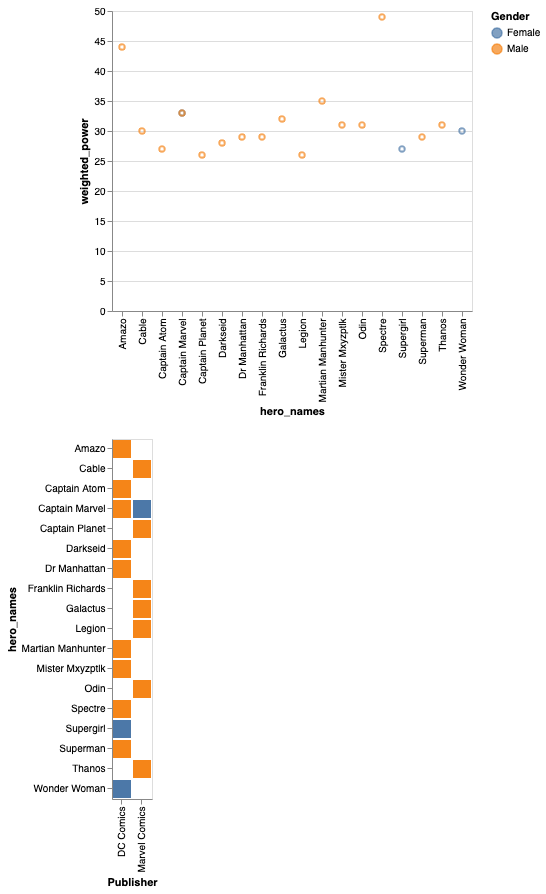

In [10]:
interval = alt.selection_interval()

points = alt.Chart(Top20SuperHeros).mark_point().encode(
  x='hero_names',
  y='weighted_power',
  color=alt.condition(interval, 'Gender', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(Top20SuperHeros).mark_bar().encode(
  x='Publisher',
  y='hero_names',
  color='Gender'
).transform_filter(interval)

points & histogram

In [11]:
#from google.colab import files
#uploaded = files.upload()
url3 = r'/Users/happy/Documents/DataSetVisualization/marvel-wikia-data.csv'

In [12]:
marvel_wikia = pd.read_csv(url3)
marvel_wikia.head()

page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   Blue Eyes  Black Hair  Male Characters  NaN   
4     Good Characters   Blue Eyes  Blond Hair  Male Characters  NaN   

               ALIVE  APPEARANCES FIRST APPEARANCE    Year  
0  Living Characters       4043.0           Aug-62  1962.0  
1  Living Characters       3360.0           Mar-41  1941.0  
2  Living Characters       3061.0           Oct-74  1974.0  
3  Living Characters       2961.0           Mar-63  1963.0  
4  Living Characters       2258.0           Nov-50  1950.0

In [13]:
#from google.colab import files
#uploaded = files.upload()
url4 = r'/Users/happy/Documents/DataSetVisualization/dc-wikia-data.csv'

In [14]:
dc_wikia = pd.read_csv(url4)
dc_wikia.head()

page_id                         name                              urlslug  \
0     1422         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1    23387        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2     1458   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     1659     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4     1576  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

   GSM              ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
0  NaN  Living Characters       3093.0        1939, May  1939.0  
1  NaN  Living Characters       2496.0    1986, October  1986.0  
2  NaN  Living Characters       1565.0    1959, October  1959.0  
3  NaN  Living Characters       1316.0   1987, February  1987.0  
4  NaN  Living Characters       1237.0      1940, April  1940.0

In [15]:
# create trace 1 that is 3d scatter
configure_plotly_browser_state()
trace1 = go.Scatter3d(
    x = dc_wikia['APPEARANCES'],
    y = dc_wikia['YEAR'],
    z = dc_wikia['ALIVE'],
    name = 'DC',
    mode='markers',
    marker=dict(
        size=10,
        color = 'black',                # set color to an array/list of desired values      
    )
)

trace2 = go.Scatter3d(
    x = marvel_wikia['APPEARANCES'],
    y = marvel_wikia['Year'],
    z = marvel_wikia['ALIVE'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = 'red'
    )
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [16]:
configure_plotly_browser_state()
trace = go.Box(
            x = dc_wikia['ALIGN'],
            y = dc_wikia['APPEARANCES'],
            name = 'DC',
            marker = dict(
                  color = 'blue')
)
                   

trace2 = go.Box(
            x = marvel_wikia['ALIGN'],
            y = marvel_wikia['APPEARANCES'],
            name = 'Marvel',
            marker = dict(
                   color = 'green'),

              )

data = [trace, trace2]

layout = go.Layout(
    boxmode = 'group',
    title = 'Character vs Appearances')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

/Users/happy/.virtualenvs/test_env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



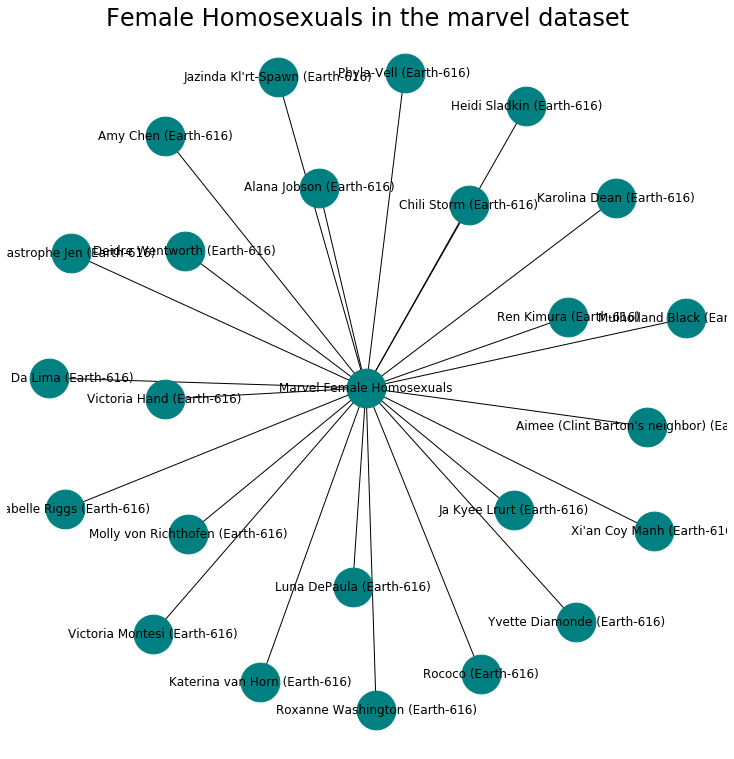

In [17]:
import networkx as nx

dataframeMarvel=marvel_wikia[(marvel_wikia['SEX']=='Female Characters') & (marvel_wikia['GSM']=='Homosexual Characters')]
dataframeMarvel['act'] ="Marvel Female Homosexuals" 
G=nx.from_pandas_edgelist(dataframeMarvel, 'act', 'name')
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_color='teal', node_size=1500, width=1.0, edge_cmap=plt.cm.Blues)
plt.title("Female Homosexuals in the marvel dataset", size=24)
plt.show()

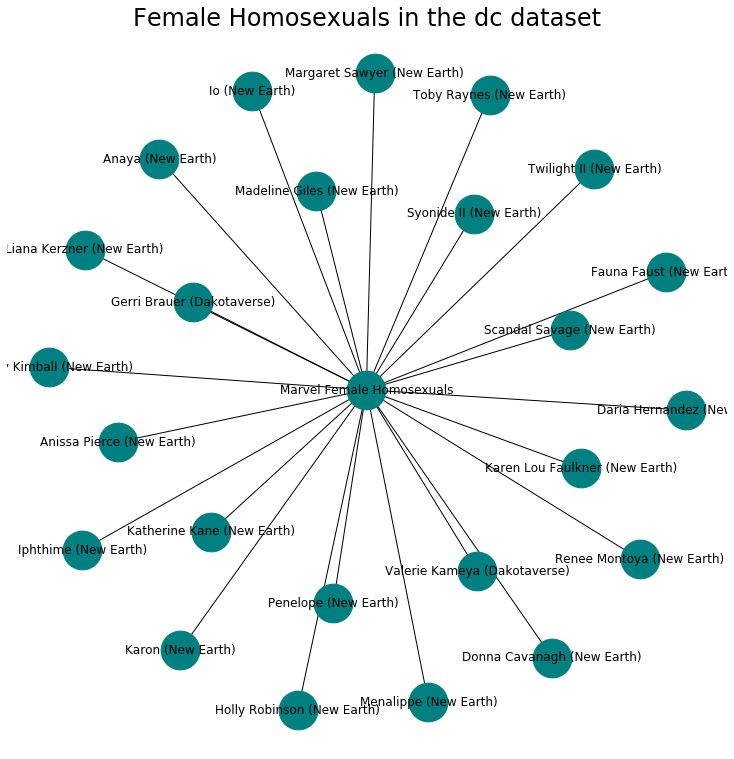

In [18]:
dataframedc=dc_wikia[(dc_wikia['SEX']=='Female Characters') & (dc_wikia['GSM']=='Homosexual Characters')]
dataframedc=dataframedc[(dataframedc['SEX']=='Female Characters') & (dataframedc['GSM']=='Homosexual Characters')]
dataframedc['act'] ="Marvel Female Homosexuals" 
G=nx.from_pandas_edgelist(dataframedc, 'act', 'name')
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, node_color='teal', node_size=1500, width=1.0, edge_cmap=plt.cm.Reds)
plt.title("Female Homosexuals in the dc dataset", size=24)
plt.show()


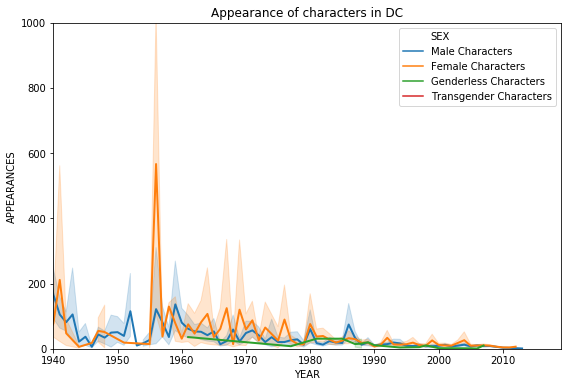

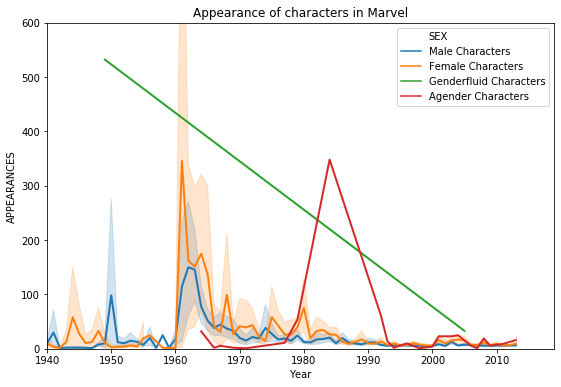

In [19]:
import seaborn as sns

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'YEAR',y = 'APPEARANCES',hue = 'SEX',data= dc_wikia,markers= True,dashes=False,lw=2)
plt.xlim(1940,2019)
plt.ylim(0,1000)
plt.title("Appearance of characters in DC")
plt.show()


plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
sns.lineplot(x = 'Year',y = 'APPEARANCES',hue = 'SEX',data= marvel_wikia,markers= True,dashes=False,lw=2)
plt.xlim(1940,2019)
plt.ylim(0,600)
plt.title("Appearance of characters in Marvel")
plt.show()

In [20]:
configure_plotly_browser_state()
gsm_dc = dc_wikia['GSM'].value_counts()
gsm_marvel = marvel_wikia['GSM'].value_counts()

label_dc = gsm_dc.index
size_dc = gsm_dc.values

label_marvel = gsm_marvel.index
size_marvel = gsm_marvel.values

colors = ['EC6B56','FFC154']

trace = go.Pie(
         labels = label_dc, values = size_dc, marker = dict(colors = colors), name = 'DC', hole = 0.3)
colors2 = ['7982B9', 'A5C1DC']

trace2 = go.Pie(labels = label_marvel, values = size_marvel, marker = dict(colors = colors2), name = 'Marvel', hole = 0.3)

data = [trace]
data2 = [trace2]

layout1 = go.Layout(
           title = 'Sexual Minority Groups in DC')
layout2 = go.Layout(
           title = 'Sexual Minority Groups in Marvel'  )

fig = go.Figure(data = data, layout = layout1)
fig2 = go.Figure(data = data2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [21]:
configure_plotly_browser_state()
sex_count = dc_wikia['ID'].value_counts()
sex1_count = marvel_wikia['ID'].value_counts()
trace1 = go.Bar(
    x=sex_count.index,
    y=sex_count.values,
    name='DC',
     marker = dict(
                  color = 'indianred')
)
trace2 = go.Bar(
    x=sex1_count.index,
    y=sex1_count.values,
    name='Marvel',
     marker = dict(
                  color = 'lightsalmon')
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title= 'Identity comparisions in between DC and Marvel'
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

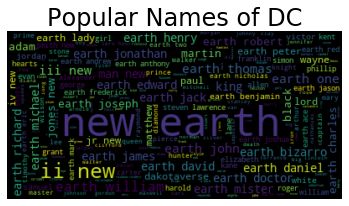

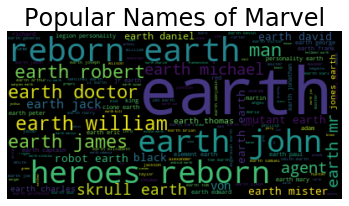

In [22]:
DC_NAME = dc_wikia['name'].tolist()
DC_NAME1 = "".join(str(v) for v in DC_NAME).lower()
from wordcloud import WordCloud
wordcloud = WordCloud().generate(DC_NAME1)
#plt.subplot(1, 2, 1)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Popular Names of DC',size=24)
plt.show()

MARVEL_NAME = marvel_wikia['name'].tolist()
MARVEL_NAME1 = "".join(str(v) for v in MARVEL_NAME).lower()
from wordcloud import WordCloud
wordcloud = WordCloud().generate(MARVEL_NAME1)

# Display the generated image:
#plt.subplot(1, 2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.title('Popular Names of Marvel',size=24)

plt.show()

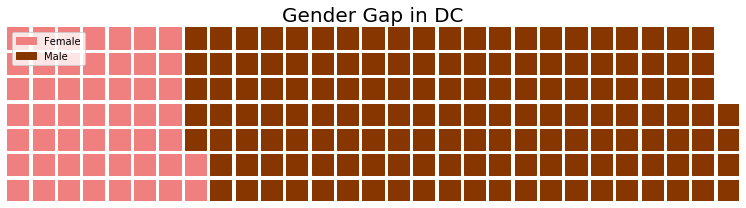

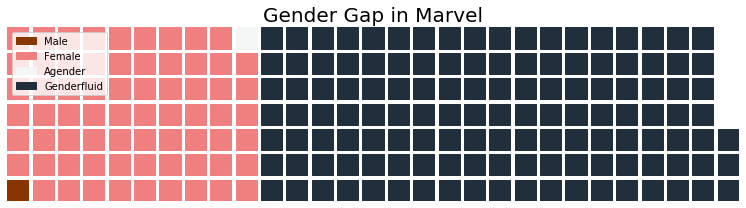

In [23]:
from pywaffle import Waffle

dataframe = dc_wikia.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')

n_categories = dataframe.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate

fig = plt.figure(
    FigureClass=Waffle,
    values = dataframe['counts'],
    labels = ['Female','Male'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in DC', 'fontsize': 20},    
    rows=7,
    colors=['#F08080','#873600'],
    figsize = (20, 3)
)



dataframe1 = marvel_wikia.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = dataframe1.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate

fig = plt.figure(
    FigureClass=Waffle,
    values = dataframe1['counts'],
    labels = ['Male','Female','Agender', 'Genderfluid'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in Marvel', 'fontsize': 20},    
    rows=7,
    colors=['#873600','#F08080', '#F4F6F6','#212F3C'],
    figsize = (20, 3)
)

In [24]:
configure_plotly_browser_state()
character_eyes = dc_wikia.groupby(['ALIGN','EYE']).count().name.reset_index()
character_eyes = character_eyes.groupby(['ALIGN','EYE']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_eyes
character_eyes_B=character_eyes[(character_eyes['ALIGN']=='Bad Characters')]
character_eyes_G=character_eyes[(character_eyes['ALIGN']=='Good Characters')]
character_eyes_N=character_eyes[(character_eyes['ALIGN']=='Neutral Characters')]
character_eyes_RC=character_eyes[(character_eyes['ALIGN']=='Reformed Criminals')]

trace0 = go.Scatter(
    x=character_eyes_B['ALIGN'],
    y=character_eyes_B['EYE'],
    mode='markers',
    name='Bad Characters',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=10,
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=character_eyes_G['ALIGN'],
    y=character_eyes_G['EYE'],
    mode='markers',
    name='Good Characters',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=15,
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=character_eyes_N['ALIGN'],
    y=character_eyes_N['EYE'],
    mode='markers',
    name='Neutral Characters',
    text=character_eyes_N['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=20,
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=character_eyes_RC['ALIGN'],
    y=character_eyes_RC['EYE'],
    mode='markers',
    name='Reformed Criminals',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=25,
        line=dict(
            width=2
        ),
    )
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
        showlegend=True,
        xaxis=dict(
            title="Character"
        ),
        yaxis=dict(
            title="Eye"
        ),
        title="Eye Characters Bubble For DC" 
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Eye Characters Bubble')


In [25]:
configure_plotly_browser_state()
character_eyes_m = marvel_wikia.groupby(['ALIGN','EYE']).count().name.reset_index()
character_eyes_m = character_eyes.groupby(['ALIGN','EYE']).sum().groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
character_eyes_m
character_eyes_B=character_eyes[(character_eyes_m['ALIGN']=='Bad Characters')]
character_eyes_G=character_eyes[(character_eyes_m['ALIGN']=='Good Characters')]
character_eyes_N=character_eyes[(character_eyes_m['ALIGN']=='Neutral Characters')]
character_eyes_RC=character_eyes[(character_eyes_m['ALIGN']=='Reformed Criminals')]

trace0 = go.Scatter(
    x=character_eyes_B['ALIGN'],
    y=character_eyes_B['EYE'],
    mode='markers',
    name='Bad Characters',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=10,
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=character_eyes_G['ALIGN'],
    y=character_eyes_G['EYE'],
    mode='markers',
    name='Good Characters',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=15,
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=character_eyes_N['ALIGN'],
    y=character_eyes_N['EYE'],
    mode='markers',
    name='Neutral Characters',
    text=character_eyes_N['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=20,
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=character_eyes_RC['ALIGN'],
    y=character_eyes_RC['EYE'],
    mode='markers',
    name='Reformed Criminals',
    text=character_eyes_B['name'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=25,
        line=dict(
            width=2
        ),
    )
)

data = [trace0,trace1,trace2,trace3]

layout = go.Layout(
        showlegend=True,
        xaxis=dict(
            title="Character"
        ),
        yaxis=dict(
            title="Eye"
        ),
        title="Eye Characters Bubble For Marvel" 
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Eye Characters Bubble')
